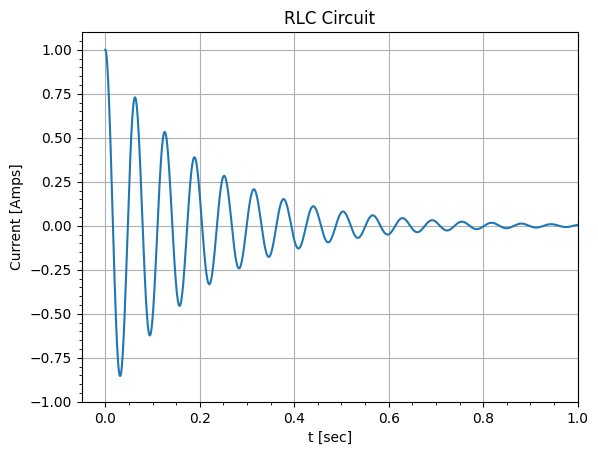

In [11]:
"""rlc_circuit.ipynb"""
# Cell 1

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from scipy.integrate import odeint  # type: ignore

if typing.TYPE_CHECKING:
    from typing import Any
    from matplotlib.axes import Axes

def model(I, t) -> Any:
    """ This function will define the ODE for the RLC circuit """ 
    # Defining the Values for the Resistor, Inductor, Capacitor, and Initial Current
    R: float = 0.1 # Ohms
    L: float = 0.01 # Henries 
    C: float = 0.01 # Farads
    
    # referred to https://nathantypanski.com/blog/2014-08-23-ode-solver-py.html
    # I[1] refers to the first derivative of the current. I[0] refers to current 
    return [I[1], -(1 / (L * C)) * I[0] - (R / L) *I[1]]
    
def plot(ax: Axes) -> None: 
    """ This function will plot the Solution to the ODE and time """
    # To set time using np.arange, putting max steps in 1_000's decimal place. 
    # from 0 to 1 inclusive
    t = np.arange(0, 1, 0.001)
    
    # The odeint function will numerically solve ODE's by taking in the ODE and range
    # The brackets are the initial condition for the system. 
    # [1, 0] means that the initial value of the current I is 1 Amp when t=0
    I = odeint(model, [1, 0], t)

    # The odeint produces the solutions in an Array, the first column is the dependent variable
    # and in the second column, it is the derivative of the dependent variable
    # Use array slicing to get the solutions to the Current
    ax.plot(t, I[:,0]) 

    # Customizing Plots
    ax.set_title('RLC Circuit')
    ax.set_xlabel("t [sec]")
    ax.set_ylabel("Current [Amps]")
    # Limits set to view the plot better
    ax.set_xlim(-0.05, 1) 
    ax.set_ylim(-1, 1.1)  
    ax.grid(True) 

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    
def main() -> None:
    plt.figure(" ")
    plot(plt.axes())
    plt.show()

if __name__ == "__main__":
    main()